In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
df = pd.read_csv('/content/sample_data/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [53]:
df.drop(["CustomerID"],axis=1,inplace=True)

In [54]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


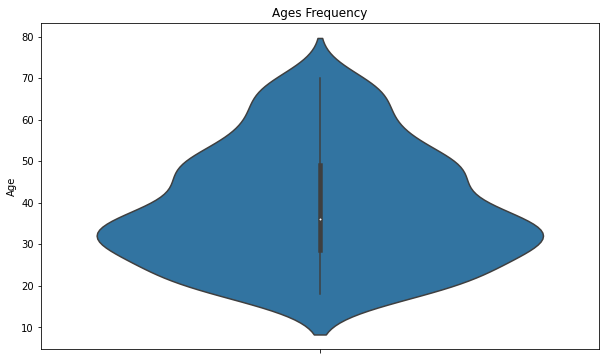

In [55]:
plt.figure(figsize=(10,6))
plt.title('Ages Frequency')
sns.violinplot(y=df['Age'])
plt.show()

In [58]:
genders = df.Genre.value_counts()
genders

Female    112
Male       88
Name: Genre, dtype: int64

In [64]:
print(genders.index)
print(genders.values)

Index(['Female', 'Male'], dtype='object')
[112  88]


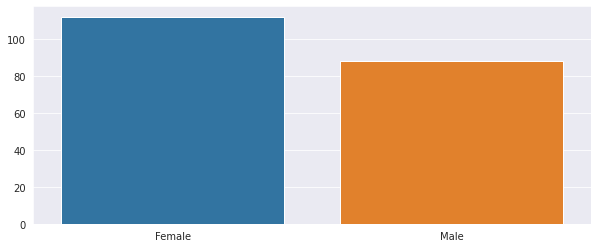

In [62]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

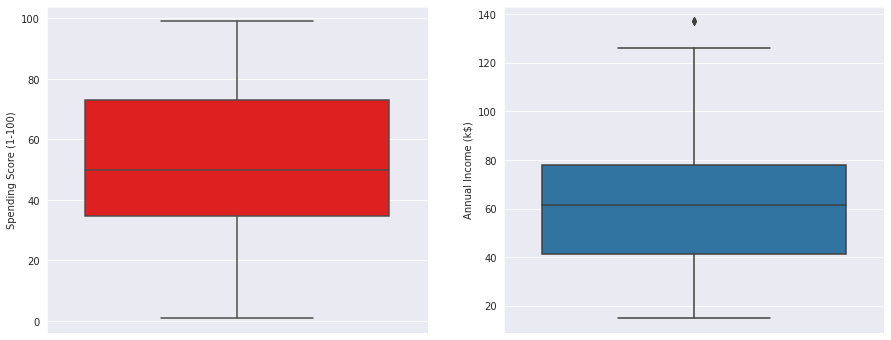

In [67]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=df["Spending Score (1-100)"], color='red')
plt.subplot(1,2,2)
sns.boxplot(y=df["Annual Income (k$)"])
plt.show()

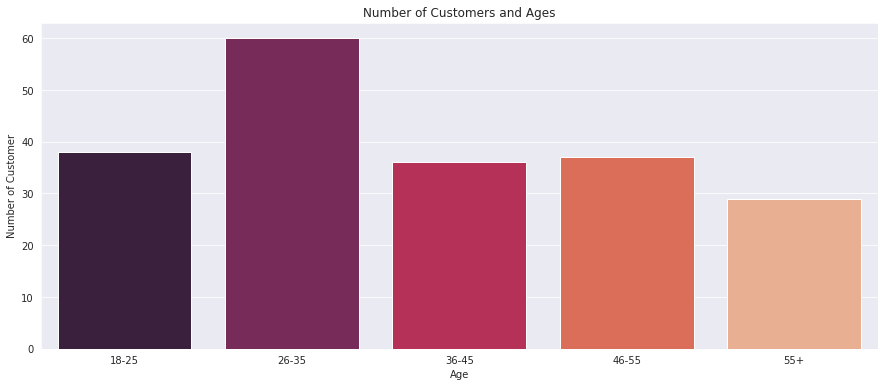

In [70]:
age18_25 = df.Age[(df.Age <=25) & (df.Age >=18)]
age26_35 = df.Age[(df.Age <=35) & (df.Age >=26)]
age36_45 = df.Age[(df.Age <=45) & (df.Age >=36)]
age46_55 = df.Age[(df.Age <=55) & (df.Age >=46)]
age55_above = df.Age[df.Age >= 56]
x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55_above.values)]
plt.figure(figsize=(15,6))
sns.barplot(x=x,y=y, palette='rocket')
plt.title("Number of Customers and Ages")
plt.xlabel('Age')
plt.ylabel('Number of Customer')
plt.show()

In [73]:
df = pd.read_csv('/content/sample_data/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
X = df.iloc[:,[3,4]].values # All rows & 3,4 columns
X

In [75]:
tempDF = pd.DataFrame(X)
tempDF.head()

,0,1
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [76]:
from sklearn.cluster import KMeans

In [78]:
model = KMeans(n_clusters=5, init='k-means++',random_state=42)
y_kmeans = model.fit_predict(X)

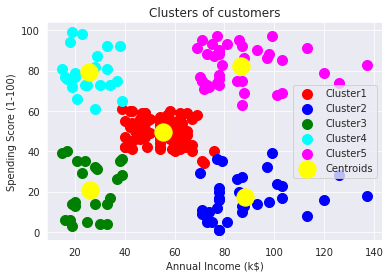

In [82]:
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='red',label='Cluster1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='blue',label='Cluster2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='green',label='Cluster3')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=100,c='cyan',label='Cluster4')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=100,c='magenta',label='Cluster5')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.title('Clusters of customers')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

In [83]:
centers = pd.DataFrame(model.cluster_centers_)
centers

,0,1
0,55.296296,49.518519
1,88.200000,17.114286
2,26.304348,20.913043
3,25.727273,79.363636
4,86.538462,82.128205


1
269981.28
2
181363.59595959593
3
106348.37306211122
4
73679.78903948836
5
44448.4554479337
6
37265.86520484346
7
30259.65720728547
8
25095.70320999756
9
21830.041978049434
10
20736.679938924128


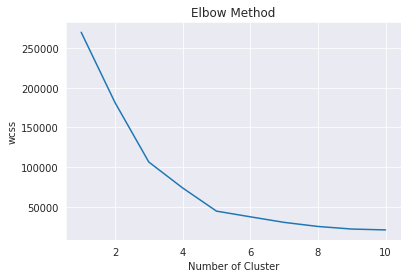

In [89]:
wcss=[]
for i in range(1,11):
  print(i)
  km = KMeans(n_clusters=i, init='k-means++', max_iter=300,n_init=10,random_state=0)
  km.fit(X)
  wcss.append(km.inertia_)
  print(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel('Number of Cluster')
plt.ylabel('wcss')
plt.show()

In [39]:
X=df.iloc[:,:].values
X

array([[1, 'Male', 19, 15, 39],
       [2, 'Male', 21, 15, 81],
       [3, 'Female', 20, 16, 6],
       [4, 'Female', 23, 16, 77],
       [5, 'Female', 31, 17, 40],
       [6, 'Female', 22, 17, 76],
       [7, 'Female', 35, 18, 6],
       [8, 'Female', 23, 18, 94],
       [9, 'Male', 64, 19, 3],
       [10, 'Female', 30, 19, 72],
       [11, 'Male', 67, 19, 14],
       [12, 'Female', 35, 19, 99],
       [13, 'Female', 58, 20, 15],
       [14, 'Female', 24, 20, 77],
       [15, 'Male', 37, 20, 13],
       [16, 'Male', 22, 20, 79],
       [17, 'Female', 35, 21, 35],
       [18, 'Male', 20, 21, 66],
       [19, 'Male', 52, 23, 29],
       [20, 'Female', 35, 23, 98],
       [21, 'Male', 35, 24, 35],
       [22, 'Male', 25, 24, 73],
       [23, 'Female', 46, 25, 5],
       [24, 'Male', 31, 25, 73],
       [25, 'Female', 54, 28, 14],
       [26, 'Male', 29, 28, 82],
       [27, 'Female', 45, 28, 32],
       [28, 'Male', 35, 28, 61],
       [29, 'Female', 40, 29, 31],
       [30, 'Female', 23

In [40]:
from sklearn.preprocessing import LabelEncoder
labelencoder_obj = LabelEncoder()
integer_encode = labelencoder_obj.fit_transform(X[:,1])
print(integer_encode)

[1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 0 0 1 1 0 0 1 0 1 0 0 0
 1 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 1 1
 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 1 1 0
 0 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 0 0
 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1]


In [41]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('Genre',OneHotEncoder(),[1])],remainder='passthrough')
X = ct.fit_transform(X)
X

array([[0.0, 1.0, 1, 19, 15, 39],
       [0.0, 1.0, 2, 21, 15, 81],
       [1.0, 0.0, 3, 20, 16, 6],
       ...,
       [0.0, 1.0, 198, 32, 126, 74],
       [0.0, 1.0, 199, 32, 137, 18],
       [0.0, 1.0, 200, 30, 137, 83]], dtype=object)

In [42]:
X = X[:,1:]
X.shape

(200, 5)

In [43]:
X

array([[1.0, 1, 19, 15, 39],
       [1.0, 2, 21, 15, 81],
       [0.0, 3, 20, 16, 6],
       [0.0, 4, 23, 16, 77],
       [0.0, 5, 31, 17, 40],
       [0.0, 6, 22, 17, 76],
       [0.0, 7, 35, 18, 6],
       [0.0, 8, 23, 18, 94],
       [1.0, 9, 64, 19, 3],
       [0.0, 10, 30, 19, 72],
       [1.0, 11, 67, 19, 14],
       [0.0, 12, 35, 19, 99],
       [0.0, 13, 58, 20, 15],
       [0.0, 14, 24, 20, 77],
       [1.0, 15, 37, 20, 13],
       [1.0, 16, 22, 20, 79],
       [0.0, 17, 35, 21, 35],
       [1.0, 18, 20, 21, 66],
       [1.0, 19, 52, 23, 29],
       [0.0, 20, 35, 23, 98],
       [1.0, 21, 35, 24, 35],
       [1.0, 22, 25, 24, 73],
       [0.0, 23, 46, 25, 5],
       [1.0, 24, 31, 25, 73],
       [0.0, 25, 54, 28, 14],
       [1.0, 26, 29, 28, 82],
       [0.0, 27, 45, 28, 32],
       [1.0, 28, 35, 28, 61],
       [0.0, 29, 40, 29, 31],
       [0.0, 30, 23, 29, 87],
       [1.0, 31, 60, 30, 4],
       [0.0, 32, 21, 30, 73],
       [1.0, 33, 53, 33, 4],
       [1.0, 34, 18, 33, 

In [1]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('/content/Online Retail.xlsx')
df.head()

In [4]:
df_col = df.columns
df_col

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [5]:
df_col = df_col.str.strip()
df_col

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [6]:
df_col = df_col.str.lower()
df_col

Index(['invoiceno', 'stockcode', 'description', 'quantity', 'invoicedate',
       'unitprice', 'customerid', 'country'],
      dtype='object')

In [7]:
df_col = df_col.str.replace(' ','-')
df_col

Index(['invoiceno', 'stockcode', 'description', 'quantity', 'invoicedate',
       'unitprice', 'customerid', 'country'],
      dtype='object')

In [ ]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ','-')
df.head()

In [20]:
print('Count of unique invoice numbers: {cnt}'.format(cnt=df.invoiceno.nunique())) # Extract the unique values

Count of unique invoice numbers: 25900


In [21]:
print('Data dimension (row count, col count): {dim}'.format(dim=df.shape))

Data dimension (row count, col count): (541909, 8)


In [22]:
print('Count of unique customerid: {cnt}'.format(cnt=df.customerid.nunique()))

Count of unique customerid: 4372


In [ ]:
df['invoiceno'].value_counts() # Each invoiceno occurence count

In [ ]:
df['invoiceno'] = df['invoiceno'].astype('str') # convert the invoiceno datatype to string
df.info()

In [ ]:
df = df[~df['invoiceno'].str.contains('C')] # give the df invoiceno records without C in invoiceno.
print(len(df))

In [ ]:
df['country'].unique()
len(df['country'].unique())

In [ ]:
basket = (df[df['country']=='Australia'].groupby(['invoiceno','description'])['quantity'])
basket.head()

In [ ]:
basket = (df[df['country']=='Australia'].groupby(['invoiceno','description'])['quantity']).sum()  # Group by 
basket.head()

In [ ]:
basket = (df[df['country']=='Australia'].groupby(['invoiceno','description'])['quantity']).sum().unstack() 
# invoice no is act as index & all description unique values are columns
basket.head()

In [ ]:
basket = (df[df['country']=='Australia'].groupby(['invoiceno','description'])['quantity']).sum().unstack().reset_index()
# invoice no is present in 1st column
basket.head()

In [ ]:
basket=(df[df['country']=='Australia']
        .groupby(['invoiceno','description'])['quantity']
        .sum().unstack().reset_index().fillna(0)
        .set_index('invoiceno'))
# All NaN values will be replacing with 0
basket.head()

In [20]:
def encode_units(x):
  if x <= 0:
    return 0
  if x >= 1:
    return 1

In [ ]:
basket_sets = basket.applymap(encode_units) # apply map will convert the >1 values into 1.
basket_sets.head()

In [ ]:
basket_sets[['POSTAGE']].head()

In [23]:
print(len(basket_sets.columns))
basket_sets.drop('POSTAGE', inplace=True, axis=1) # drop the POSTAGE column
print(len(basket_sets.columns))

608
607


In [24]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [ ]:
frequent_items = apriori(basket_sets,min_support=0.07,use_colnames=True)  # Items appearing 7 out of 100 times
frequent_items

In [ ]:
rules = association_rules(frequent_items,metric='lift',min_threshold=1)
rules.head()

In [28]:
rules.shape

(800, 9)

In [ ]:
df1 = rules[(rules['lift']>=6) & (rules['confidence']>=0.8)]
df1.head()

In [33]:
print(basket['RED RETROSPOT CAKE STAND'].sum())

73.0


In [34]:
print(basket['36 PENCILS TUBE RED RETROSPOT'].sum())

385.0
